## Preparing text data for Tensorflow

In [4]:
# The high level steps to prepare text to be used in a machine learning model are:

# Tokenize the words to get numerical values for them
# Create numerical sequences of the sentences
# Adjust the sequences to all be the same length.

In [26]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
# Import Tokenizer and pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [14]:
path_df = os.getcwd()+"/combined_data.csv"

In [17]:
#Example sentences 

sentences = [
    'My favorite food is ice cream',
    'do you like ice cream too?',
    'My dog likes ice cream!',
    "your favorite flavor of icecream is chocolate",
    "chocolate isn't good for dogs",
    "your dog, your cat, and your parrot prefer broccoli"
]
print(sentences)

['My favorite food is ice cream', 'do you like ice cream too?', 'My dog likes ice cream!', 'your favorite flavor of icecream is chocolate', "chocolate isn't good for dogs", 'your dog, your cat, and your parrot prefer broccoli']


### Create the Tokenizer and define an out of vocabulary token

In [18]:
tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")

In [19]:
# Tokenise the words 

In [20]:
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'your': 2, 'ice': 3, 'cream': 4, 'my': 5, 'favorite': 6, 'is': 7, 'dog': 8, 'chocolate': 9, 'food': 10, 'do': 11, 'you': 12, 'like': 13, 'too': 14, 'likes': 15, 'flavor': 16, 'of': 17, 'icecream': 18, "isn't": 19, 'good': 20, 'for': 21, 'dogs': 22, 'cat': 23, 'and': 24, 'parrot': 25, 'prefer': 26, 'broccoli': 27}


### Turn sentences into sequences and do the padding of the sequences 


In [21]:
sequences  = tokenizer.texts_to_sequences(sentences)


# add maxlength to padding sequence, padding start from backside of the array "padding = "post", 
padded = pad_sequences(sequences, maxlen=15, padding="post")
print(padded)


# if some words do not exist in the sentences, we will get values with 1 number as their encoding in sentences. 
# Try turning sentences that contain words that 
# aren't in the word index into sequences.

# Add your own sentences to the test_data
test_data = [
    "my best friend's favorite ice cream flavor is strawberry",
    "my dog's best friend is a manatee"
]
print (test_data)

# Remind ourselves which number corresponds to the
# out of vocabulary token in the word index
print("<OOV> has the number", word_index['<OOV>'], "in the word index.")

# Convert the test sentences to sequences
test_seq = tokenizer.texts_to_sequences(test_data)
print("\nTest Sequence = ", test_seq)

# Pad the new sequences
padded = pad_sequences(test_seq, maxlen=10)
print("\nPadded Test Sequence: ")

# Notice that "1" appears in the sequence wherever there's a word 
# that's not in the word index
print(padded)

[[ 5  6 10  7  3  4  0  0  0  0  0  0  0  0  0]
 [11 12 13  3  4 14  0  0  0  0  0  0  0  0  0]
 [ 5  8 15  3  4  0  0  0  0  0  0  0  0  0  0]
 [ 2  6 16 17 18  7  9  0  0  0  0  0  0  0  0]
 [ 9 19 20 21 22  0  0  0  0  0  0  0  0  0  0]
 [ 2  8  2 23 24  2 25 26 27  0  0  0  0  0  0]]
["my best friend's favorite ice cream flavor is strawberry", "my dog's best friend is a manatee"]
<OOV> has the number 1 in the word index.

Test Sequence =  [[5, 1, 1, 6, 3, 4, 16, 7, 1], [5, 1, 1, 1, 7, 1, 1]]

Padded Test Sequence: 
[[ 0  5  1  1  6  3  4 16  7  1]
 [ 0  0  0  5  1  1  1  7  1  1]]


## Sentiment Analysis Model using Embedding layer in NN

In [ ]:
#Word2Vec, Glove has pretrained word_2_vec embeddings 

In [32]:
dataset = pd.read_csv(path_df)

sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

### Tokenise the dataset

In [33]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Tokeniser using oov for out of vector word marking
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# fitting the model
tokenizer.fit_on_texts(training_sentences)


# map the work embeddings
word_index = tokenizer.word_index

# generate sequence from sentences 
sequences = tokenizer.texts_to_sequences(training_sentences)

# padding the sequenecs 
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)

# testing the sequences 
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

# testing the padding
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

In [34]:
## Making a model using embeddings using embedding layer is first (always), 
# and the output is only 1 node as it is either 0 or 1 (negative or positive)


# creting models
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# model compilation 
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           16000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 9606      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 25,613
Trainable params: 25,613
Non-trainable params: 0
_________________________________________________________________


In [35]:
num_epochs = 20


model.fit(padded, training_labels_final, epochs=num_epochs,
          validation_data=(testing_padded, testing_labels_final))

Train on 1593 samples, validate on 399 samples
Epoch 1/20
1593/1593 [==============================] - 1s 405us/sample - loss: 0.6918 - accuracy: 0.5261 - val_loss: 0.6897 - val_accuracy: 0.5940
Epoch 2/20
1593/1593 [==============================] - 0s 93us/sample - loss: 0.6822 - accuracy: 0.5794 - val_loss: 0.6895 - val_accuracy: 0.4887
Epoch 3/20
1593/1593 [==============================] - 0s 77us/sample - loss: 0.6455 - accuracy: 0.6955 - val_loss: 0.6619 - val_accuracy: 0.6040
Epoch 4/20
1593/1593 [==============================] - 0s 135us/sample - loss: 0.5544 - accuracy: 0.8261 - val_loss: 0.5783 - val_accuracy: 0.7393
Epoch 5/20
1593/1593 [==============================] - 0s 135us/sample - loss: 0.4287 - accuracy: 0.8845 - val_loss: 0.5306 - val_accuracy: 0.7619
Epoch 6/20
1593/1593 [==============================] - 0s 96us/sample - loss: 0.3183 - accuracy: 0.9228 - val_loss: 0.4783 - val_accuracy: 0.7719
Epoch 7/20
1593/1593 [==============================] - 0s 85us/samp

In [36]:
## Predicting sentiments of new sentences 
# Use the model to predict a review   
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']

print(fake_reviews) 

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')              

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
    print(fake_reviews[x])
    print(classes[x])
    print('\n')

# Try adding reviews of your own
# Add some negative words (such as "not") to the good reviews and see what happens
# For example:
# they gave us free chocolate cake and did not charge us

['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

I love this phone
[0.9989819]


I hate spaghetti
[0.00496294]


Everything was cold
[0.07408956]


Everything was hot exactly as I wanted
[0.27716425]


Everything was green
[0.19495757]


the host seated us immediately
[0.9793767]


they gave us free chocolate cake
[0.99142224]


not sure about the wilted flowers on the table
[0.00218304]


only works when I stand on tippy toes
[0.9965418]


does not work when I stand on my head
[0.0012881]




### Tweaking the model 

In [39]:
# reduced vocab size 
vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"


tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)

training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [40]:
# using global average pooling 

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 16)            8000      
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 8,109
Trainable params: 8,109
Non-trainable params: 0
_________________________________________________________________


In [41]:
num_epochs = 30
history = model.fit(training_padded, training_labels_final, 
                    epochs=num_epochs, 
                    validation_data=(testing_padded, 
                                     testing_labels_final))

Train on 1593 samples, validate on 399 samples
Epoch 1/30
1593/1593 [==============================] - 1s 453us/sample - loss: 0.6927 - accuracy: 0.5085 - val_loss: 0.6956 - val_accuracy: 0.4110
Epoch 2/30
1593/1593 [==============================] - 0s 88us/sample - loss: 0.6902 - accuracy: 0.5223 - val_loss: 0.6966 - val_accuracy: 0.4110
Epoch 3/30
1593/1593 [==============================] - 0s 124us/sample - loss: 0.6871 - accuracy: 0.5405 - val_loss: 0.6941 - val_accuracy: 0.4411
Epoch 4/30
1593/1593 [==============================] - 0s 148us/sample - loss: 0.6819 - accuracy: 0.5612 - val_loss: 0.6915 - val_accuracy: 0.4762
Epoch 5/30
1593/1593 [==============================] - 0s 160us/sample - loss: 0.6726 - accuracy: 0.6045 - val_loss: 0.6832 - val_accuracy: 0.5088
Epoch 6/30
1593/1593 [==============================] - 0s 124us/sample - loss: 0.6579 - accuracy: 0.6604 - val_loss: 0.6658 - val_accuracy: 0.6165
Epoch 7/30
1593/1593 [==============================] - 0s 82us/sa

### Generating plots after tweaking

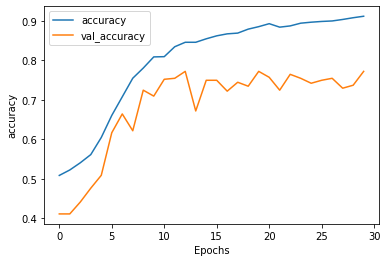

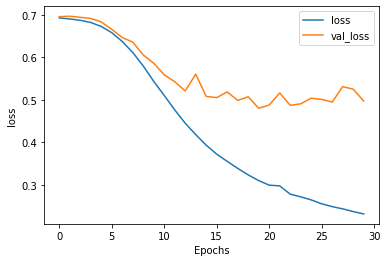

In [42]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Testing the model

In [ ]:
# Use the model to predict a review   
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']

print(fake_reviews) 

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')              

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
    print(fake_reviews[x])
    print(classes[x])
    print('\n')

# Try adding reviews of your own
# Add some negative words (such as "not") to the good reviews and see what happens
# For example:


In [48]:
eg = tokenizer.texts_to_sequences(["they gave us free chocolate cake and did not charge us"])

In [51]:
model.predict(pad_sequences(eg, padding=padding_type, maxlen=max_length))

array([[0.7134279]], dtype=float32)